In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle


# **Import Ipl Dataset**

In [ ]:
ipl_data=pd.read_csv('ipl.csv')
ipl_data.shape

In [ ]:
ipl_data.head(5)

# Data Cleaning Process

In [ ]:
#removing unwanted columns
column_delete=['mid','venue','batsman','bowler','striker','non-striker']
ipl_data.drop(labels=column_delete,axis=1,inplace=True)

In [ ]:
ipl_data.head(5)

In [ ]:
[ipl_data['bat_team'].unique()]

In [ ]:
current_team=['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
        'Mumbai Indians', 'Kings XI Punjab',
        'Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad']


In [ ]:
ipl_data=ipl_data[(ipl_data['bat_team'].isin(current_team))&(ipl_data['bowl_team'].isin(current_team))]

In [ ]:
ipl_data.shape

In [ ]:
#Removing First 6 over i.e Powerplay to that we have atleast 6 over data to predict
ipl_data=ipl_data[ipl_data['overs']>=6.0]

In [ ]:
ipl_data.head(5)

In [ ]:
#Convert Data string to datetime object
from datetime import datetime
ipl_data['date']=ipl_data['date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))


In [35]:
#Data Preprocessing : One Hot Encoding
encoded_ipl=pd.get_dummies(data=ipl_data,columns=['bat_team','bowl_team'])

In [36]:
encoded_ipl.head(5)

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
38,2008-04-18,62,1,6.1,55,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
39,2008-04-18,63,1,6.2,52,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
40,2008-04-18,64,1,6.3,47,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
41,2008-04-18,66,1,6.4,45,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
42,2008-04-18,67,1,6.5,46,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [37]:
#Rearranging Dataset
encoded_ipl.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [38]:
encoded_ipl=encoded_ipl[['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
        'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad','total']]

# Train Test Split

In [39]:
x_train=encoded_ipl.drop(labels='total',axis=1)[encoded_ipl['date'].dt.year<=2016]
x_test=encoded_ipl.drop(labels='total',axis=1)[encoded_ipl['date'].dt.year>2016]


In [40]:
y_train=encoded_ipl[encoded_ipl['date'].dt.year<=2016]['total'].values
y_test=encoded_ipl[encoded_ipl['date'].dt.year>2016]['total'].values

In [41]:
#remove date column
x_train.drop(labels='date',axis=True,inplace=True)
x_test.drop(labels='date',axis=True,inplace=True)

# Model Building
 

In [42]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [43]:
y_pred=lr.predict(x_test)

/var/folders/h0/k0wrm20n1499mrj648bjlk_80000gn/T/ipykernel_41237/963874834.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


<Axes: ylabel='Density'>

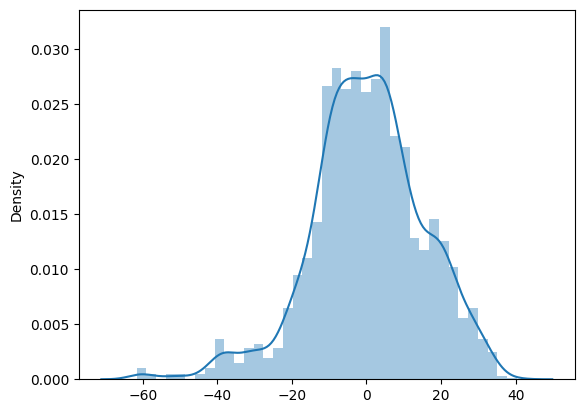

In [44]:
import seaborn as sns
sns.distplot(y_test-y_pred)

In [45]:
# Creating a pickle file for the classifier
filename = 'first-innings-score-lr-model.pkl'
pickle.dump(regressor, open(filename, 'wb'))



NameError: name 'regressor' is not defined

In [ ]:
from sklearn import metrics
print('Mean Absolute Error :',(metrics.mean_absolute_error(y_test,y_pred)))